# <span style='color:black'> Capstone Project - Hospital Neighborhood Selection for Traveling Nurses in New York City
### Applied Data Science Capstone by IBM/Coursera</span>

## Introduction:  Business Problem

<p> Traveling nurses are healthcare professionals who choose to work in cities with short term nurse staffing needs.  The benefits of being a traveling nurse can be
<br> higher pay and the ability to travel around the country exploring cities. Challenges with this traveling profession are identification of cities that meet 
<br> your interests and professional needs. 
    <p> This tool will help prospective travelling nurses identify hospital neighborhoods with appealing venues within a radius of the hospital. 
<p>This data science project will explore integration of hospital rating data available from the Center for Medicare and Medicaid services with Foursquare venue data. 
   <p> In the United States, the Medicare program is a government sponsored health insurance program for adults age 65 and older and some people with disabilities. 
    <br>Medicaid is a government-sponsored health program for low-income people. The U.S. Gov has developed metrics and requirements hospitals must follow to continue
        <br> to receive Federal aid.  
    <p> The analysis will be performed just for hospitals in the five boroughs of New York City. In addition, the Foursquare data will be optimized to provide sights
    <br> focusing on one of the parameters of a Foursquare query (section). Parameters from Foursquare are: food, drinks, coffee, shops, arts, outdoors, sights, 
        <br> trending, nextVenues, or topPicks. Choosing one of these limits results to venues with the specified category or property.
       <p> The results will provide neighborhood clusters centered around the hospitals in New York and show 
    <br> the top venues for each neighborhood. This data will be displayed on a map and help the prospective nurses better select their desirable hospital neighborhoods. 
        
      


##  <span style='color:green'> Travelling Nurse Use Case 8302020  </span> 

#### <span style='color:black'> A Use Case is defined for each traveling nurse profile. This then allows the search to be tailored.  </span>

 The nurse in Use Case 08302020 has experience in developing processes to improve the Safety of Care measure. 
 <br> They are interested in working in hospitals with the Safety of Care measure below the national average.
<br> Preferred hospital type = Acute Care hospital. 
<br> Preferred venue type in neighborhood = Arts and Outdoors
<br> Preferred hospital rating focus area = Prefers hospitals with low Safety of Care. 
    

## Data

<p> The Foursquare API will be used to retrieve venue information around the hospitals in New York City. 
    <br>In addition to the Foursquare Data, the Hospital Ratings data will be used to evaluate hospitals in the city.
   <p> Hospitals in the United States are rated based on 7 areas of Quality including Mortality, Safety of Care, 
       <br> Readmission, Patient Experience, Effectiveness of Care, Timeliness of Care, and Efficient Use of Medical Imaging. 
       <br> The ratings in these seven areas are combined into a star rating for each hospital (range of 1-5 starts). 
       <br> There are up to 51 measures across the 7 categories, but hospital ratings are only calculated using those measures 
       <br> for which data are available. The average hospital rating is based on about 37 measures. A hospital summary score
       <br> is then calculated by taking the weighted average of these group scores.
       <p> Hospitals in the United States (excluding Veterans Affairs and Dept of Defense Hospitals) report data to 
           <br> the Centers for Medicare & Medicaid Services. This includes about 4,000 Medicare-certified hospitals across the country.
       
           
<p> The complete data set of all Hospital Measures is avaialble at https://data.medicare.gov/data/hospital-compare
               


### <span style='color:gray'> Data Features </span>

The Hospital Data from the Center for Medicaid services has the following data fields:
<br> 1. Hospital Facility Name 
<br> 2. Hospital Facility Unique ID
<br> 3. Hospital Address
<br> 4. Hospital County
<br> 5. Hospital State
<br> 6. Hospital Ownership Type
<br> 7. Hospital Type (Acute Care or Psychiatric)
<br> 8. Hospital Interoperability with Wlectronic Health Records
<br> 9. Hospital Overall Rating
<br> 10. Hospital Rating on the individual 7 quality factors listed above

<p> Some data is missing from the ratings for the 7 quality factors. 
    <br>To receive an overall star rating, hospitals must have at least 3 measures. Three of the metrics are considered outcome ratings and include Mortality, Safety, and Readmission. 
    <br> A hospital must have a rating in at least one of these 3 outcome fields to receive an overall star rating. 


## Install Environment

In [21]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


print('Libraries imported.')

Libraries imported.


In [42]:
#This install may take 30 minutes
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: done

# All requested packages already installed.



In [1]:
#install Folium for mapping - this may take over 35 minutes
!conda install -c conda-forge folium=0.11.0 --yes 
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.11.0


The following packages will be UPDATED:

    certifi:         2020.6.20-py36_0  anaconda --> 2020.6.20-py36h9f0ad1d_0 conda-forge
    openssl:         1.1.1g-h7b6447c_0 anaconda --> 1.1.1g-h516909a_1        conda-forge

The following packages will be DOWNGRADED:

    ca-certificates: 2020.7.22-0       anaconda --> 2020.6.20-hecda079_0     conda-forge

Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [5]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn==0.10.1 -y

Solving environment: done

# All requested packages already installed.



## Methodology

<br> 1. Load the hospital data set and perform exploratory data anlsysis on the features in this data set. 
<br> 2. Perform Data pre-processing and Feature Extraction. Analyze the number of hospitals in the five boroughs
<br> 3. Use GeoPy to add lat and long to the hospital addresses. This will be the "Hospital Neighborhoods"
<br> 4. Call the Foursquare API to retrieve venues around the defined radius of the hospital neighborhoods. 
<br> 5. Since the Foursquare data is heavily slanted towards restaurants, use the venues/explore method limit the venues to only Outdoors using the 'section' parameter. 
<br> 6. Run K means clusters to cluster features in the hospital neighborhoods
<br> 7. Test the best number of clusters to retrieve a good distribution of features. 
<br> 8. Analyze neighborhoods with the most popular outdoor venues
<br> 9. Perform a second Foursquare call for Arts venues. 
<br> 10. Make a recommendation of the best Hospital neighborhood to live and work in as a traveling nurse who desires Arts and Outdoor activities. 


### <span style='color:gray'> Load the hospital rating data set </span>

In [184]:
# The code was removed by Watson Studio for sharing.

(5319, 28)


,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for promoting interoperability of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,10005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
2,10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 768-8400,Acute Care Hospitals,Proprietary,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,(334) 493-3541,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,Same as the national average,NaN
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,(334) 335-3374,Acute Care Hospitals,Proprietary,Yes,NaN,4,NaN,Same as the national average,NaN,Not Available,5.0,Above the national average,NaN,Not Available,16.0,Same as the national average,NaN,Above the national average,NaN,Not Available,5.0


### <span style='color:blue'> Conclusion- There are 5319 hospitals in the dataset in all 50 states plus U.S. territories  </span>

### <span style='color:gray'> Data Preprocessing and Feature Extraction </span>

In [185]:
#Remove Columns that reference the footnotes and other data not important to this analysis 

hospitalsALL.drop(['Phone Number','Meets criteria for promoting interoperability of EHRs', 'Hospital overall rating footnote', 'Emergency Services', 'Mortality national comparison footnote','Safety of care national comparison footnote','Patient experience national comparison','Patient experience national comparison footnote','Readmission national comparison footnote','Mortality national comparison','Readmission national comparison'], axis=1, inplace=True)
print(hospitalsALL.shape)
hospitalsALL.head()

(5319, 17)


,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Hospital Type,Hospital Ownership,Hospital overall rating,Safety of care national comparison,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,Acute Care Hospitals,Government - Hospital District or Authority,2,Same as the national average,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,10005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,Acute Care Hospitals,Government - Hospital District or Authority,2,Same as the national average,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
2,10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,Acute Care Hospitals,Proprietary,2,Same as the national average,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,Acute Care Hospitals,Voluntary non-profit - Private,2,Same as the national average,Below the national average,NaN,Above the national average,NaN,Same as the national average,NaN
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,Acute Care Hospitals,Proprietary,4,Not Available,Same as the national average,NaN,Above the national average,NaN,Not Available,5.0


In [186]:
#also drop the ratings that overall or safety ratings 
hospitalsALL = hospitalsALL.iloc[0:5320,0:11]
print(hospitalsALL.shape)
hospitalsALL.head()

(5319, 11)


,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Hospital Type,Hospital Ownership,Hospital overall rating,Safety of care national comparison
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,Acute Care Hospitals,Government - Hospital District or Authority,2,Same as the national average
1,10005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,Acute Care Hospitals,Government - Hospital District or Authority,2,Same as the national average
2,10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,Acute Care Hospitals,Proprietary,2,Same as the national average
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,Acute Care Hospitals,Voluntary non-profit - Private,2,Same as the national average
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,Acute Care Hospitals,Proprietary,4,Not Available


In [187]:
hospitalsALL['Hospital overall rating'].value_counts()


Not Available    1749
4                1135
3                1103
2                 702
5                 407
1                 223
Name: Hospital overall rating, dtype: int64

In [188]:
hospitalsALL['Safety of care national comparison'].value_counts()

Not Available                   2711
Above the national average      1218
Below the national average       847
Same as the national average     543
Name: Safety of care national comparison, dtype: int64

In [189]:
#Simplify column names

hospitalsALL.rename(columns={'County Name':'County', 'Hospital overall rating': 'Rating', 'Hospital Type':'Type','Hospital Ownership':'Ownership','ZIP Code':'ZipCode', 'Facility Name':'Facility','Facility ID':'ID', 'Emergency Services':'ER','Safety of care national comparison':'Safety'}, inplace=True)
hospitalsALL.head()

,ID,Facility,Address,City,State,ZipCode,County,Type,Ownership,Rating,Safety
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,Acute Care Hospitals,Government - Hospital District or Authority,2,Same as the national average
1,10005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,Acute Care Hospitals,Government - Hospital District or Authority,2,Same as the national average
2,10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,Acute Care Hospitals,Proprietary,2,Same as the national average
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,Acute Care Hospitals,Voluntary non-profit - Private,2,Same as the national average
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,Acute Care Hospitals,Proprietary,4,Not Available


In [190]:
hospitalsALL.dropna()
print(hospitalsALL.shape)
hospitalsALL.head()

(5319, 11)


,ID,Facility,Address,City,State,ZipCode,County,Type,Ownership,Rating,Safety
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,Acute Care Hospitals,Government - Hospital District or Authority,2,Same as the national average
1,10005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,Acute Care Hospitals,Government - Hospital District or Authority,2,Same as the national average
2,10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,Acute Care Hospitals,Proprietary,2,Same as the national average
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,Acute Care Hospitals,Voluntary non-profit - Private,2,Same as the national average
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,Acute Care Hospitals,Proprietary,4,Not Available


In [191]:
#Convert hospital ownership to numerical values
#'Voluntary non-profit - Other'= 0
#'Proprietary' = 1
#'Voluntary non-profit - Private' = 2
#'Voluntary non-profit - Church'= 3
#'Government - State'= 4
#'Government - Local'= 5
#'Government - Federal'= 6
#'Government - Hospital District or Authority' = 7
#'Department of Defense'= 8
#'Physician' = 9
# 'Tribal' =10
hospitalsALL['Ownership'].replace(to_replace=['Voluntary non-profit - Other','Proprietary','Voluntary non-profit - Private','Voluntary non-profit - Church','Government - State','Government - Local','Government - Federal','Government - Hospital District or Authority','Department of Defense','Physician','Tribal'], value=[0,1,2,3,4,5,6,7,8,9,10],inplace=True)
hospitalsALL.head()

,ID,Facility,Address,City,State,ZipCode,County,Type,Ownership,Rating,Safety
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,Acute Care Hospitals,7,2,Same as the national average
1,10005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,Acute Care Hospitals,7,2,Same as the national average
2,10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,Acute Care Hospitals,1,2,Same as the national average
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,Acute Care Hospitals,2,2,Same as the national average
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,Acute Care Hospitals,1,4,Not Available


In [192]:
#Convert Safety ratings to numbers
hospitalsALL['Safety'].replace(to_replace=['Not Available','Below the national average','Same as the national average','Above the national average'], value=[0,1,2,3],inplace=True)
hospitalsALL.head()

,ID,Facility,Address,City,State,ZipCode,County,Type,Ownership,Rating,Safety
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,Acute Care Hospitals,7,2,2
1,10005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,Acute Care Hospitals,7,2,2
2,10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,Acute Care Hospitals,1,2,2
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,Acute Care Hospitals,2,2,2
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,Acute Care Hospitals,1,4,0


In [193]:
#Remove psychiatric hospitals
hospitalsALL = hospitalsALL.set_index('Type')
hospitalsALL = hospitalsALL.loc[['Acute Care Hospitals']]
print(hospitalsALL.shape)
hospitalsALL.head()

(3262, 10)


,ID,Facility,Address,City,State,ZipCode,County,Ownership,Rating,Safety
Type,,,,,,,,,,
Acute Care Hospitals,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,7,2,2
Acute Care Hospitals,10005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,7,2,2
Acute Care Hospitals,10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,1,2,2
Acute Care Hospitals,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,2,2,2
Acute Care Hospitals,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,1,4,0


In [194]:
#make sure rating and safety values are numeric
hospitalsALL.reset_index()
print(hospitalsALL.shape)
hospitalsALL.dtypes

(3262, 10)


ID           object
Facility     object
Address      object
City         object
State        object
ZipCode       int64
County       object
Ownership     int64
Rating       object
Safety        int64
dtype: object

In [195]:
hospitalsALL['Rating'].replace(to_replace=['Not Available','1','2','3','4','5'], value=[0,1,2,3,4,5],inplace=True)
hospitalsALL.dtypes

ID           object
Facility     object
Address      object
City         object
State        object
ZipCode       int64
County       object
Ownership     int64
Rating        int64
Safety        int64
dtype: object

In [196]:
#determine the number of missing values
hospitalsALL.isna().sum()

ID           0
Facility     0
Address      0
City         0
State        0
ZipCode      0
County       0
Ownership    0
Rating       0
Safety       0
dtype: int64

In [197]:
hospitalsALL.reset_index()
hospitalsALL.describe()

,ZipCode,Ownership,Rating,Safety
count,3262.000000,3262.000000,3262.000000,3262.000000
mean,51349.158492,2.461373,2.811159,1.696812
std,28334.350761,2.058828,1.432705,1.172770
min,603.000000,0.000000,0.000000,0.000000
25%,29572.500000,1.000000,2.000000,1.000000
50%,48271.500000,2.000000,3.000000,2.000000
75%,76165.750000,3.000000,4.000000,3.000000
max,99801.000000,10.000000,5.000000,3.000000


In [198]:
hospitals2 = hospitalsALL[['Ownership','Safety']]
print(hospitals2.shape)



(3262, 2)


In [199]:
#set index to desired field on the x axis
hospitals2 = hospitals2.set_index('Ownership')
hospitals2.head()

,Safety
Ownership,
7,2
7,2
1,2
2,2
1,0


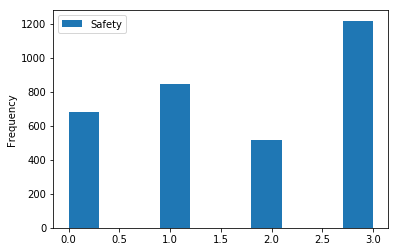

In [200]:
hospitals2.plot.hist(by='Safety')

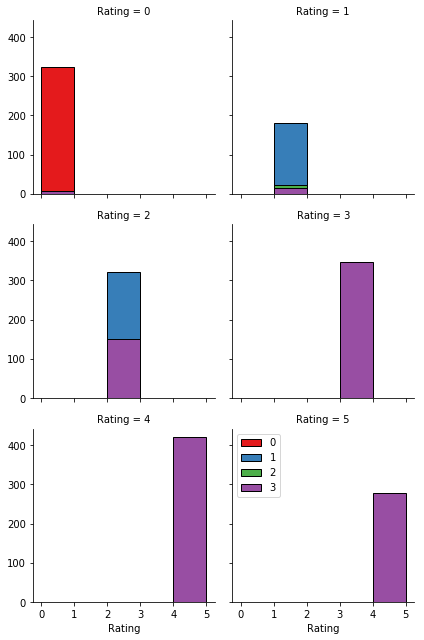

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

bins = np.linspace(hospitalsALL.Rating.min(), hospitalsALL.Rating.max(), 6)
g = sns.FacetGrid(hospitalsALL,col="Rating", hue="Safety", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Rating', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Conclusion- Hospitals with an overall rating greater than 3 also have a Safety rating that is at or above the national average.
## Select only hospitals with overall rating <3. This will provide the best opportunity for this Travelling Nurse Use Case

### <span style='color:gray'> Narrow down the hospital data set tojust the hospitals in the 5 boroughs of New York City </span>

In [202]:
#reset index to State and remove states that are not NY
hospitalsALL = hospitalsALL.set_index('State')
hospitalsALL.head()


,ID,Facility,Address,City,ZipCode,County,Ownership,Rating,Safety
State,,,,,,,,,
AL,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,7,2,2
AL,10005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,35957,MARSHALL,7,2,2
AL,10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,35630,LAUDERDALE,1,2,2
AL,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,36467,COVINGTON,2,2,2
AL,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,36049,CRENSHAW,1,4,0


In [203]:
hospitalsNY= hospitalsALL.loc[[('NY')]]
print(hospitalsNY.shape)
hospitalsNY.head()

(143, 9)


,ID,Facility,Address,City,ZipCode,County,Ownership,Rating,Safety
State,,,,,,,,,
NY,330003,ALBANY MEMORIAL HOSPITAL,600 NORTHERN BOULEVARD,ALBANY,12204,ALBANY,2,2,0
NY,330004,HEALTHALLIANCE HOSPITAL BROADWAY CAMPUS,396 BROADWAY,KINGSTON,12401,ULSTER,2,2,2
NY,330005,KALEIDA HEALTH,100 HIGH STREET,BUFFALO,14210,ERIE,2,2,1
NY,330006,ST JOSEPH'S MEDICAL CENTER,127 SOUTH BROADWAY,YONKERS,10701,WESTCHESTER,2,1,1
NY,330008,WYOMING COUNTY COMMUNITY HOSPITAL,400 NORTH MAIN STREET,WARSAW,14569,WYOMING,5,3,0


### There are 143 hospitals in the State of New York

In [204]:
#When we reset the index, the old index is added as a column, and a new sequential index is used
hospitalsNY = hospitalsNY.reset_index()


In [205]:
#Set the index to county so that we can filter on the counties representing the NYC burourghs
hospitalsNY = hospitalsNY.set_index('County')
print(hospitalsNY.shape)
hospitalsNY.head()

(143, 9)


,State,ID,Facility,Address,City,ZipCode,Ownership,Rating,Safety
County,,,,,,,,,
ALBANY,NY,330003,ALBANY MEMORIAL HOSPITAL,600 NORTHERN BOULEVARD,ALBANY,12204,2,2,0
ULSTER,NY,330004,HEALTHALLIANCE HOSPITAL BROADWAY CAMPUS,396 BROADWAY,KINGSTON,12401,2,2,2
ERIE,NY,330005,KALEIDA HEALTH,100 HIGH STREET,BUFFALO,14210,2,2,1
WESTCHESTER,NY,330006,ST JOSEPH'S MEDICAL CENTER,127 SOUTH BROADWAY,YONKERS,10701,2,1,1
WYOMING,NY,330008,WYOMING COUNTY COMMUNITY HOSPITAL,400 NORTH MAIN STREET,WARSAW,14569,5,3,0


In [206]:
#filter the data set on the 5 buroughs or counties in NYC
hospitalsNYC= hospitalsNY.loc[['BRONX','NEW YORK','QUEENS','KINGS','RICHMOND']]
print(hospitalsNYC.shape)
hospitalsNYC.head()

(36, 9)


,State,ID,Facility,Address,City,ZipCode,Ownership,Rating,Safety
County,,,,,,,,,
BRONX,NY,330009,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1276 FULTON AVENUE,BRONX,10456,1,1,1
BRONX,NY,330059,MONTEFIORE MEDICAL CENTER,111 EAST 210TH STREET,BRONX,10467,2,1,1
BRONX,NY,330080,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 EAST 149TH STREET,BRONX,10451,5,1,1
BRONX,NY,330127,JACOBI MEDICAL CENTER,1400 PELHAM PARKWAY SOUTH,BRONX,10461,5,1,1
BRONX,NY,330385,NORTH CENTRAL BRONX HOSPITAL,3424 KOSSUTH AVENUE,BRONX,10467,5,2,2


In [207]:
#Set the index to rating and remove all hospitals with Safety rating of 1 or 2
hospitalsNYC = hospitalsNYC.set_index('Safety')
print(hospitalsNYC.shape)
hospitalsNYC.head()

(36, 8)


,State,ID,Facility,Address,City,ZipCode,Ownership,Rating
Safety,,,,,,,,
1,NY,330009,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1276 FULTON AVENUE,BRONX,10456,1,1
1,NY,330059,MONTEFIORE MEDICAL CENTER,111 EAST 210TH STREET,BRONX,10467,2,1
1,NY,330080,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 EAST 149TH STREET,BRONX,10451,5,1
1,NY,330127,JACOBI MEDICAL CENTER,1400 PELHAM PARKWAY SOUTH,BRONX,10461,5,1
2,NY,330385,NORTH CENTRAL BRONX HOSPITAL,3424 KOSSUTH AVENUE,BRONX,10467,5,2


### Conclusion- There are 36 hospitals in the city of New York. 

In [208]:
#drop hospitals with overall rating over 3
hospitalsNYC = hospitalsNYC.drop(0)
hospitalsNYC =hospitalsNYC.drop(3)

print(hospitalsNYC.shape)


(30, 8)


## Conclusion- There are 30 hospitals of the 37 in NYC that have a Safety rating of 1 or 2 (At or below national average)

In [209]:
hospitalsNYC = hospitalsNYC.reset_index()
hospitalsNYC

,Safety,State,ID,Facility,Address,City,ZipCode,Ownership,Rating
0,1,NY,330009,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1276 FULTON AVENUE,BRONX,10456,1,1
1,1,NY,330059,MONTEFIORE MEDICAL CENTER,111 EAST 210TH STREET,BRONX,10467,2,1
2,1,NY,330080,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 EAST 149TH STREET,BRONX,10451,5,1
3,1,NY,330127,JACOBI MEDICAL CENTER,1400 PELHAM PARKWAY SOUTH,BRONX,10461,5,1
4,2,NY,330385,NORTH CENTRAL BRONX HOSPITAL,3424 KOSSUTH AVENUE,BRONX,10467,5,2
5,1,NY,330399,ST BARNABAS HOSPITAL,4422 THIRD AVENUE,BRONX,10457,2,1
6,1,NY,330101,NEW YORK-PRESBYTERIAN HOSPITAL,525 EAST 68TH STREET,NEW YORK,10065,2,3
7,1,NY,330119,LENOX HILL HOSPITAL,100 EAST 77TH STREET,NEW YORK,10021,2,3
8,1,NY,330169,MOUNT SINAI BETH ISRAEL,327 E 16th STREET,NEW YORK,10003,2,2
9,2,NY,330199,METROPOLITAN HOSPITAL CENTER,1901 FIRST AVENUE,NEW YORK,10029,5,2


### <span style='color:gray'> Clean up the address for geolocating latitude and longitude </span>

In [210]:
#convert ZipCode to integer df['DataFrame Column'] = df['DataFrame Column'].astype(str)
#Need to do this before concatenating columns in the next step
hospitalsNYC['ZipCode'] = hospitalsNYC['ZipCode'].astype(str)

In [211]:
#the Geocoder is having trouble with numeric street names spelled out  like "SIXTH", so convert these numberically before concantenting into the Full Address column
# DataFrame.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad') 

hospitalsNYC=hospitalsNYC.replace(to_replace='SIXTH', value = "6th",regex=True)
hospitalsNYC=hospitalsNYC.replace(to_replace='TENTH', value = "10th",regex=True)
hospitalsNYC=hospitalsNYC.replace(to_replace='FIRST', value = "1st",regex=True)

hospitalsNYC.head(10)

,Safety,State,ID,Facility,Address,City,ZipCode,Ownership,Rating
0,1,NY,330009,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1276 FULTON AVENUE,BRONX,10456,1,1
1,1,NY,330059,MONTEFIORE MEDICAL CENTER,111 EAST 210TH STREET,BRONX,10467,2,1
2,1,NY,330080,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 EAST 149TH STREET,BRONX,10451,5,1
3,1,NY,330127,JACOBI MEDICAL CENTER,1400 PELHAM PARKWAY SOUTH,BRONX,10461,5,1
4,2,NY,330385,NORTH CENTRAL BRONX HOSPITAL,3424 KOSSUTH AVENUE,BRONX,10467,5,2
5,1,NY,330399,ST BARNABAS HOSPITAL,4422 THIRD AVENUE,BRONX,10457,2,1
6,1,NY,330101,NEW YORK-PRESBYTERIAN HOSPITAL,525 EAST 68TH STREET,NEW YORK,10065,2,3
7,1,NY,330119,LENOX HILL HOSPITAL,100 EAST 77TH STREET,NEW YORK,10021,2,3
8,1,NY,330169,MOUNT SINAI BETH ISRAEL,327 E 16th STREET,NEW YORK,10003,2,2
9,2,NY,330199,METROPOLITAN HOSPITAL CENTER,1901 1st AVENUE,NEW YORK,10029,5,2


In [212]:
#Try this- Concatenate the Address,City, State and ZipCode 
hospitalsNYC['FullAddress']= hospitalsNYC['Address'] +' ' +hospitalsNYC['City']+' '+ hospitalsNYC['State']+' '+hospitalsNYC['ZipCode']

print(hospitalsNYC.shape)
hospitalsNYC.head()

(30, 10)


,Safety,State,ID,Facility,Address,City,ZipCode,Ownership,Rating,FullAddress
0,1,NY,330009,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1276 FULTON AVENUE,BRONX,10456,1,1,1276 FULTON AVENUE BRONX NY 10456
1,1,NY,330059,MONTEFIORE MEDICAL CENTER,111 EAST 210TH STREET,BRONX,10467,2,1,111 EAST 210TH STREET BRONX NY 10467
2,1,NY,330080,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 EAST 149TH STREET,BRONX,10451,5,1,234 EAST 149TH STREET BRONX NY 10451
3,1,NY,330127,JACOBI MEDICAL CENTER,1400 PELHAM PARKWAY SOUTH,BRONX,10461,5,1,1400 PELHAM PARKWAY SOUTH BRONX NY 10461
4,2,NY,330385,NORTH CENTRAL BRONX HOSPITAL,3424 KOSSUTH AVENUE,BRONX,10467,5,2,3424 KOSSUTH AVENUE BRONX NY 10467


In [213]:
HospitalsNYC = hospitalsNYC[['Facility','FullAddress', 'Rating', 'Safety']]
HospitalsNYC['Location'] = ''
print(HospitalsNYC.shape)
HospitalsNYC

(30, 5)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Facility,FullAddress,Rating,Safety,Location
0,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1276 FULTON AVENUE BRONX NY 10456,1,1,
1,MONTEFIORE MEDICAL CENTER,111 EAST 210TH STREET BRONX NY 10467,1,1,
2,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 EAST 149TH STREET BRONX NY 10451,1,1,
3,JACOBI MEDICAL CENTER,1400 PELHAM PARKWAY SOUTH BRONX NY 10461,1,1,
4,NORTH CENTRAL BRONX HOSPITAL,3424 KOSSUTH AVENUE BRONX NY 10467,2,2,
5,ST BARNABAS HOSPITAL,4422 THIRD AVENUE BRONX NY 10457,1,1,
6,NEW YORK-PRESBYTERIAN HOSPITAL,525 EAST 68TH STREET NEW YORK NY 10065,3,1,
7,LENOX HILL HOSPITAL,100 EAST 77TH STREET NEW YORK NY 10021,3,1,
8,MOUNT SINAI BETH ISRAEL,327 E 16th STREET NEW YORK NY 10003,2,1,
9,METROPOLITAN HOSPITAL CENTER,1901 1st AVENUE NEW YORK NY 10029,2,2,


### <span style='color:blue'> Conclusion- 30 hospitals will be used to develop "Hospital Neighborhoods" to compare the cultural experience of the neighborhood around the Hospital with Foursquare data  </span>

## Create Neighborhoods around the hospitals

### <span style='color:gray'> Use geopy Nominatum to look up lat long of addresses in refined hospitals list </span>

In [214]:
#Create locator that holds the Geocoding service, Nominatim. Then pass the locator ('newyork_explorer') addresses to geocode
address = 'New York, NY, US'

geolocator = Nominatim(user_agent="newyork_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of New York, NY, US are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of New York, NY, US are 40.7127281, -74.0060152.


In [215]:
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

HospitalsNYC['Location'] = HospitalsNYC['FullAddress'].apply(geocode)
HospitalsNYC['point'] = HospitalsNYC['Location'].apply(lambda loc: tuple(loc.point) if loc else None)
print(HospitalsNYC.shape)
HospitalsNYC

(30, 6)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Facility,FullAddress,Rating,Safety,Location,point
0,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1276 FULTON AVENUE BRONX NY 10456,1,1,(Bronx-Lebanon Hospital Center Fulton Division...,"(40.8314156, -73.90317287906956, 0.0)"
1,MONTEFIORE MEDICAL CENTER,111 EAST 210TH STREET BRONX NY 10467,1,1,(Montefiore Medical Center West Campus Moses D...,"(40.8800853, -73.8798439, 0.0)"
2,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 EAST 149TH STREET BRONX NY 10451,1,1,"(Lincoln Hospital, 234, East 149th Street, Mot...","(40.81703305, -73.92437016189787, 0.0)"
3,JACOBI MEDICAL CENTER,1400 PELHAM PARKWAY SOUTH BRONX NY 10461,1,1,"(NYC Health + Hospitals/Jacobi, 1400, Pelham P...","(40.8545669, -73.84585054557537, 0.0)"
4,NORTH CENTRAL BRONX HOSPITAL,3424 KOSSUTH AVENUE BRONX NY 10467,2,2,"(North Central Bronx Hospital, 3424, Kossuth A...","(40.8803581, -73.8813965, 0.0)"
5,ST BARNABAS HOSPITAL,4422 THIRD AVENUE BRONX NY 10457,1,1,"(Third Avenue, Mott Haven, New York, The Bron...","(40.8156201, -73.9184457, 0.0)"
6,NEW YORK-PRESBYTERIAN HOSPITAL,525 EAST 68TH STREET NEW YORK NY 10065,3,1,(NewYork-Presbyterian / Weill Cornell Medical ...,"(40.764702099999994, -73.9540033012178, 0.0)"
7,LENOX HILL HOSPITAL,100 EAST 77TH STREET NEW YORK NY 10021,3,1,"(100, East 77th Street, Upper East Side, New Y...","(40.7735341, -73.9601007, 0.0)"
8,MOUNT SINAI BETH ISRAEL,327 E 16th STREET NEW YORK NY 10003,2,1,"(327, East 16th Street, Manhattan, Gramercy, N...","(40.73319844897959, -73.98262787755101, 0.0)"
9,METROPOLITAN HOSPITAL CENTER,1901 1st AVENUE NEW YORK NY 10029,2,2,"(1901, 1st Avenue, Robert F. Wagner Houses, Yo...","(40.7847711, -73.9439047, 0.0)"


In [216]:
#the Location and point are being returned as a tuple)
HospitalsNYC[['lat','long','alt']] = pd.DataFrame(HospitalsNYC.point.tolist())
print(HospitalsNYC.shape)
HospitalsNYC.head()

(30, 9)


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Facility,FullAddress,Rating,Safety,Location,point,lat,long,alt
0,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1276 FULTON AVENUE BRONX NY 10456,1,1,(Bronx-Lebanon Hospital Center Fulton Division...,"(40.8314156, -73.90317287906956, 0.0)",40.831416,-73.903173,0.0
1,MONTEFIORE MEDICAL CENTER,111 EAST 210TH STREET BRONX NY 10467,1,1,(Montefiore Medical Center West Campus Moses D...,"(40.8800853, -73.8798439, 0.0)",40.880085,-73.879844,0.0
2,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 EAST 149TH STREET BRONX NY 10451,1,1,"(Lincoln Hospital, 234, East 149th Street, Mot...","(40.81703305, -73.92437016189787, 0.0)",40.817033,-73.924370,0.0
3,JACOBI MEDICAL CENTER,1400 PELHAM PARKWAY SOUTH BRONX NY 10461,1,1,"(NYC Health + Hospitals/Jacobi, 1400, Pelham P...","(40.8545669, -73.84585054557537, 0.0)",40.854567,-73.845851,0.0
4,NORTH CENTRAL BRONX HOSPITAL,3424 KOSSUTH AVENUE BRONX NY 10467,2,2,"(North Central Bronx Hospital, 3424, Kossuth A...","(40.8803581, -73.8813965, 0.0)",40.880358,-73.881396,0.0


In [217]:
HospitalsNYC =HospitalsNYC[['Facility','lat','long']]
HospitalsNYC = HospitalsNYC.round(decimals=2)
HospitalsNYC

,Facility,lat,long
0,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,40.83,-73.90
1,MONTEFIORE MEDICAL CENTER,40.88,-73.88
2,LINCOLN MEDICAL & MENTAL HEALTH CENTER,40.82,-73.92
3,JACOBI MEDICAL CENTER,40.85,-73.85
4,NORTH CENTRAL BRONX HOSPITAL,40.88,-73.88
5,ST BARNABAS HOSPITAL,40.82,-73.92
6,NEW YORK-PRESBYTERIAN HOSPITAL,40.76,-73.95
7,LENOX HILL HOSPITAL,40.77,-73.96
8,MOUNT SINAI BETH ISRAEL,40.73,-73.98
9,METROPOLITAN HOSPITAL CENTER,40.78,-73.94


### <span style='color:gray'> Use Folium to create a map of NYC with the hospitals </span>

In [218]:
# create map of NYC using latitude and longitude values
map_hospitalsNYC = folium.Map(location=[latitude, longitude], width='75%', height='75%',min_zoom=0, max_zoom=18, zoom_start=11)

# add markers to map
for lat, lng, ID in zip(HospitalsNYC['lat'], HospitalsNYC['long'], HospitalsNYC['Facility']):
    label = '{}'.format(ID)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hospitalsNYC) 

In [219]:
map_hospitalsNYC

## Integrate Foursquare data with the hospital neighborhoods


In [220]:
# The code was removed by Watson Studio for sharing.

Completed


### <span style='color:gray'> The Foursquare data tends to return alot of restaurant data. To increase the impact of venues in Arts and & Entertainment and Outdoors, use the section constraint in the Foursquare call </span>

### <span style='color:gray'> First we will limit to venues categorized as 'Outdoors' by Foursquare. </span>

In [221]:
#Defining a new founction to cycle on this for each neighborhood


def getNearbyOutdoorsVenues(names, latitudes, longitudes, radius=500, section = 'outdoors',LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&section={}&limit={}'.format(
            CLIENT_ID, # your Foursquare ID
            CLIENT_SECRET,  # your Foursquare Secret
            VERSION, # Foursquare API version 
            lat, 
            lng, 
            radius, 
            section,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category Name']
    
    return(nearby_venues)

In [222]:
hospital_venues = getNearbyOutdoorsVenues(names=HospitalsNYC['Facility'],latitudes=HospitalsNYC['lat'], longitudes=HospitalsNYC['long'])
print(hospital_venues.shape)
hospital_venues.head()

BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVISION
MONTEFIORE MEDICAL CENTER
LINCOLN MEDICAL & MENTAL HEALTH CENTER
JACOBI MEDICAL CENTER
NORTH CENTRAL BRONX HOSPITAL
ST BARNABAS HOSPITAL
NEW YORK-PRESBYTERIAN HOSPITAL
LENOX HILL HOSPITAL
MOUNT SINAI BETH ISRAEL
METROPOLITAN HOSPITAL CENTER
BELLEVUE HOSPITAL CENTER
NEW YORK UNIVERSITY LANGONE MEDICAL CENTER
HARLEM HOSPITAL CENTER
JAMAICA HOSPITAL MEDICAL CENTER
ELMHURST HOSPITAL CENTER
FLUSHING HOSPITAL MEDICAL CENTER
ST JOHN'S EPISCOPAL HOSPITAL AT SOUTH SHORE
BROOKLYN HOSPITAL CENTER - DOWNTOWN CAMPUS
MAIMONIDES MEDICAL CENTER
NYC HEALTH + HOSPITALS/CONEY ISLAND
KINGSBROOK JEWISH MEDICAL CENTER
KINGS COUNTY HOSPITAL CENTER
WYCKOFF HEIGHTS MEDICAL CENTER
BROOKDALE HOSPITAL MEDICAL CENTER
NEW YORK-PRESBYTERIAN/BROOKLYN METHODIST HOSPITAL
SUNY/DOWNSTATE UNIVERSITY HOSPITAL OF BROOKLYN
WOODHULL MEDICAL & MENTAL HEALTH CENTER
INTERFAITH MEDICAL CENTER
RICHMOND UNIVERSITY MEDICAL CENTER
STATEN ISLAND UNIVERSITY HOSPITAL
(444, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category Name
0,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,40.83,-73.9,Retro Fitness,40.831190,-73.905395,Gym
1,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,40.83,-73.9,McKinley Square Park,40.831097,-73.900112,Park
2,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,40.83,-73.9,Drew Playground,40.832992,-73.903008,Park
3,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,40.83,-73.9,Hines Park,40.828836,-73.905431,Playground
4,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,40.83,-73.9,Estella Diggs Park,40.829151,-73.905706,Park


In [223]:
# Examine the number of items returned from Foursquare for each neighborhood
hospital_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category Name
Neighborhood,,,,,,
BELLEVUE HOSPITAL CENTER,58,58,58,58,58,58
BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVISION,5,5,5,5,5,5
BROOKDALE HOSPITAL MEDICAL CENTER,2,2,2,2,2,2
BROOKLYN HOSPITAL CENTER - DOWNTOWN CAMPUS,59,59,59,59,59,59
ELMHURST HOSPITAL CENTER,11,11,11,11,11,11
FLUSHING HOSPITAL MEDICAL CENTER,2,2,2,2,2,2
HARLEM HOSPITAL CENTER,22,22,22,22,22,22
INTERFAITH MEDICAL CENTER,19,19,19,19,19,19
JACOBI MEDICAL CENTER,5,5,5,5,5,5


### <span style='color:gray'> Analyze each neighborhood for Outdoors Section venues </span>

In [224]:
# one hot encoding
hospital_onehot = pd.get_dummies(hospital_venues[['Venue Category Name']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hospital_onehot['Neighborhood'] = hospital_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [hospital_onehot.columns[-1]] + list(hospital_onehot.columns[:-1])
hospital_onehot =hospital_onehot[fixed_columns]

print(hospital_onehot.shape)
hospital_onehot.head(10)

(444, 43)


,Neighborhood,Athletics & Sports,Baseball Field,Basketball Court,Beach,Boxing Gym,Cycle Studio,Dog Run,Farm,Fountain,Garden,Golf Course,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Indoor Play Area,Lake,Martial Arts School,Mountain,Outdoor Gym,Outdoors & Recreation,Park,Pedestrian Plaza,Pilates Studio,Playground,Plaza,Pool,Rafting,Recreation Center,Roof Deck,Scenic Lookout,Sculpture Garden,Skate Park,Skating Rink,Soccer Field,Sports Club,Tennis Court,Track,Trail,Tree,Weight Loss Center,Yoga Studio
0,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,MONTEFIORE MEDICAL CENTER,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,MONTEFIORE MEDICAL CENTER,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,MONTEFIORE MEDICAL CENTER,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,MONTEFIORE MEDICAL CENTER,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,MONTEFIORE MEDICAL CENTER,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### <span style='color:gray'> Now look at the frequency of Outdoor venues by neighborhood </span>

In [225]:
hospital_outdoors_grouped = hospital_onehot.groupby('Neighborhood').mean().reset_index()
print (hospital_outdoors_grouped.shape)
hospital_outdoors_grouped.head()

(30, 43)


,Neighborhood,Athletics & Sports,Baseball Field,Basketball Court,Beach,Boxing Gym,Cycle Studio,Dog Run,Farm,Fountain,Garden,Golf Course,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Indoor Play Area,Lake,Martial Arts School,Mountain,Outdoor Gym,Outdoors & Recreation,Park,Pedestrian Plaza,Pilates Studio,Playground,Plaza,Pool,Rafting,Recreation Center,Roof Deck,Scenic Lookout,Sculpture Garden,Skate Park,Skating Rink,Soccer Field,Sports Club,Tennis Court,Track,Trail,Tree,Weight Loss Center,Yoga Studio
0,BELLEVUE HOSPITAL CENTER,0.051724,0.0,0.051724,0.0,0.000000,0.0,0.000000,0.017241,0.0,0.000000,0.0,0.206897,0.224138,0.000000,0.0,0.017241,0.0,0.017241,0.0,0.0,0.0,0.086207,0.000000,0.034483,0.051724,0.034483,0.034483,0.0,0.0,0.034483,0.017241,0.0,0.0,0.0,0.017241,0.0,0.000000,0.0,0.034483,0.000000,0.000000,0.068966
1,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.200000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.600000,0.000000,0.000000,0.200000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,BROOKDALE HOSPITAL MEDICAL CENTER,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,BROOKLYN HOSPITAL CENTER - DOWNTOWN CAMPUS,0.016949,0.0,0.016949,0.0,0.016949,0.0,0.016949,0.000000,0.0,0.033898,0.0,0.033898,0.372881,0.033898,0.0,0.000000,0.0,0.050847,0.0,0.0,0.0,0.084746,0.050847,0.000000,0.033898,0.101695,0.000000,0.0,0.0,0.033898,0.033898,0.0,0.0,0.0,0.000000,0.0,0.016949,0.0,0.000000,0.016949,0.016949,0.016949
4,ELMHURST HOSPITAL CENTER,0.090909,0.0,0.000000,0.0,0.000000,0.0,0.090909,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.090909,0.0,0.272727,0.0,0.0,0.0,0.272727,0.000000,0.000000,0.090909,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.090909


### <span style='color:gray'> Repeat the same analysis using 'Arts' section by Foursquare. </span>

In [226]:
#Defining a new founction to cycle on this for each neighborhood


def getNearbyArtsVenues(names, latitudes, longitudes, radius=500, section = 'arts',LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&section={}&limit={}'.format(
            CLIENT_ID, # your Foursquare ID
            CLIENT_SECRET,  # your Foursquare Secret
            VERSION, # Foursquare API version 
            lat, 
            lng, 
            radius, 
            section,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category Name']
    
    return(nearby_venues)

In [227]:
hospital_venues2 = getNearbyArtsVenues(names=HospitalsNYC['Facility'],latitudes=HospitalsNYC['lat'], longitudes=HospitalsNYC['long'])
print(hospital_venues2.shape)
hospital_venues2.head()

BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVISION
MONTEFIORE MEDICAL CENTER
LINCOLN MEDICAL & MENTAL HEALTH CENTER
JACOBI MEDICAL CENTER
NORTH CENTRAL BRONX HOSPITAL
ST BARNABAS HOSPITAL
NEW YORK-PRESBYTERIAN HOSPITAL
LENOX HILL HOSPITAL
MOUNT SINAI BETH ISRAEL
METROPOLITAN HOSPITAL CENTER
BELLEVUE HOSPITAL CENTER
NEW YORK UNIVERSITY LANGONE MEDICAL CENTER
HARLEM HOSPITAL CENTER
JAMAICA HOSPITAL MEDICAL CENTER
ELMHURST HOSPITAL CENTER
FLUSHING HOSPITAL MEDICAL CENTER
ST JOHN'S EPISCOPAL HOSPITAL AT SOUTH SHORE
BROOKLYN HOSPITAL CENTER - DOWNTOWN CAMPUS
MAIMONIDES MEDICAL CENTER
NYC HEALTH + HOSPITALS/CONEY ISLAND
KINGSBROOK JEWISH MEDICAL CENTER
KINGS COUNTY HOSPITAL CENTER
WYCKOFF HEIGHTS MEDICAL CENTER
BROOKDALE HOSPITAL MEDICAL CENTER
NEW YORK-PRESBYTERIAN/BROOKLYN METHODIST HOSPITAL
SUNY/DOWNSTATE UNIVERSITY HOSPITAL OF BROOKLYN
WOODHULL MEDICAL & MENTAL HEALTH CENTER
INTERFAITH MEDICAL CENTER
RICHMOND UNIVERSITY MEDICAL CENTER
STATEN ISLAND UNIVERSITY HOSPITAL
(170, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category Name
0,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,40.83,-73.90,BINO,40.830484,-73.901606,Music Venue
1,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,40.83,-73.90,Alberto Superette,40.826674,-73.901740,Movie Theater
2,MONTEFIORE MEDICAL CENTER,40.88,-73.88,Mosholu Montefiore Community Center,40.882041,-73.880459,Performing Arts Venue
3,MONTEFIORE MEDICAL CENTER,40.88,-73.88,Valentine Varian House,40.877391,-73.879323,History Museum
4,MONTEFIORE MEDICAL CENTER,40.88,-73.88,Museum Of Bronx History,40.877374,-73.879441,Museum


In [228]:
# Examine the number of items returned from Foursquare for each neighborhood
hospital_venues2.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category Name
Neighborhood,,,,,,
BELLEVUE HOSPITAL CENTER,29,29,29,29,29,29
BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVISION,2,2,2,2,2,2
BROOKDALE HOSPITAL MEDICAL CENTER,2,2,2,2,2,2
BROOKLYN HOSPITAL CENTER - DOWNTOWN CAMPUS,18,18,18,18,18,18
ELMHURST HOSPITAL CENTER,2,2,2,2,2,2
FLUSHING HOSPITAL MEDICAL CENTER,2,2,2,2,2,2
HARLEM HOSPITAL CENTER,9,9,9,9,9,9
INTERFAITH MEDICAL CENTER,7,7,7,7,7,7
KINGS COUNTY HOSPITAL CENTER,2,2,2,2,2,2


In [229]:
# one hot encoding
hospital_onehot = pd.get_dummies(hospital_venues2[['Venue Category Name']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hospital_onehot['Neighborhood'] = hospital_venues2['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [hospital_onehot.columns[-1]] + list(hospital_onehot.columns[:-1])
hospital_onehot =hospital_onehot[fixed_columns]

print(hospital_onehot.shape)
hospital_onehot.head(10)

(170, 25)


,Neighborhood,Art Gallery,Art Museum,Arts & Entertainment,Circus,Comedy Club,Concert Hall,Dance Studio,Exhibit,History Museum,Indie Movie Theater,Indie Theater,Jazz Club,Movie Theater,Multiplex,Museum,Music Venue,Opera House,Outdoor Sculpture,Performing Arts Venue,Public Art,Roller Rink,Street Art,Theater,Tour Provider
0,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,MONTEFIORE MEDICAL CENTER,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,MONTEFIORE MEDICAL CENTER,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,MONTEFIORE MEDICAL CENTER,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,MONTEFIORE MEDICAL CENTER,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,LINCOLN MEDICAL & MENTAL HEALTH CENTER,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,LINCOLN MEDICAL & MENTAL HEALTH CENTER,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,LINCOLN MEDICAL & MENTAL HEALTH CENTER,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,LINCOLN MEDICAL & MENTAL HEALTH CENTER,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### <span style='color:gray'> Now look at the frequency of Arts venues by neighborhood </span>

In [230]:
hospital_arts_grouped = hospital_onehot.groupby('Neighborhood').mean().reset_index()
print (hospital_arts_grouped.shape)
hospital_arts_grouped.head()

(26, 25)


,Neighborhood,Art Gallery,Art Museum,Arts & Entertainment,Circus,Comedy Club,Concert Hall,Dance Studio,Exhibit,History Museum,Indie Movie Theater,Indie Theater,Jazz Club,Movie Theater,Multiplex,Museum,Music Venue,Opera House,Outdoor Sculpture,Performing Arts Venue,Public Art,Roller Rink,Street Art,Theater,Tour Provider
0,BELLEVUE HOSPITAL CENTER,0.241379,0.0,0.0,0.0,0.103448,0.068966,0.068966,0.034483,0.0,0.000000,0.0,0.034483,0.000000,0.034483,0.0,0.068966,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.310345,0.034483
1,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.500000,0.000000,0.0,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2,BROOKDALE HOSPITAL MEDICAL CENTER,0.500000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.500000,0.0,0.000000,0.0,0.000000,0.000000
3,BROOKLYN HOSPITAL CENTER - DOWNTOWN CAMPUS,0.055556,0.0,0.0,0.0,0.055556,0.000000,0.166667,0.000000,0.0,0.055556,0.0,0.000000,0.055556,0.000000,0.0,0.000000,0.111111,0.0,0.222222,0.0,0.055556,0.0,0.222222,0.000000
4,ELMHURST HOSPITAL CENTER,0.500000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000


## Join both dataframes on the neighborhood column to combine Arts and Outdoors frequencies 

In [231]:
#Set Neighborhood as index so we can do the join 
hospital_outdoors_grouped = hospital_outdoors_grouped.set_index('Neighborhood')

In [232]:
hospital_arts_grouped = hospital_arts_grouped.set_index('Neighborhood')

In [233]:
hospital_grouped = pd.merge(hospital_arts_grouped, hospital_outdoors_grouped, on='Neighborhood')
print (hospital_grouped.shape)
hospital_grouped.head(5)

(26, 66)


,Art Gallery,Art Museum,Arts & Entertainment,Circus,Comedy Club,Concert Hall,Dance Studio,Exhibit,History Museum,Indie Movie Theater,Indie Theater,Jazz Club,Movie Theater,Multiplex,Museum,Music Venue,Opera House,Outdoor Sculpture,Performing Arts Venue,Public Art,Roller Rink,Street Art,Theater,Tour Provider,Athletics & Sports,Baseball Field,Basketball Court,Beach,Boxing Gym,Cycle Studio,Dog Run,Farm,Fountain,Garden,Golf Course,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Indoor Play Area,Lake,Martial Arts School,Mountain,Outdoor Gym,Outdoors & Recreation,Park,Pedestrian Plaza,Pilates Studio,Playground,Plaza,Pool,Rafting,Recreation Center,Roof Deck,Scenic Lookout,Sculpture Garden,Skate Park,Skating Rink,Soccer Field,Sports Club,Tennis Court,Track,Trail,Tree,Weight Loss Center,Yoga Studio
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BELLEVUE HOSPITAL CENTER,0.241379,0.0,0.0,0.0,0.103448,0.068966,0.068966,0.034483,0.0,0.000000,0.0,0.034483,0.000000,0.034483,0.0,0.068966,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.310345,0.034483,0.051724,0.0,0.051724,0.0,0.000000,0.0,0.000000,0.017241,0.0,0.000000,0.0,0.206897,0.224138,0.000000,0.0,0.017241,0.0,0.017241,0.0,0.0,0.0,0.086207,0.000000,0.034483,0.051724,0.034483,0.034483,0.0,0.0,0.034483,0.017241,0.0,0.0,0.0,0.017241,0.0,0.000000,0.0,0.034483,0.000000,0.000000,0.068966
BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVISION,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.500000,0.000000,0.0,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.200000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.600000,0.000000,0.000000,0.200000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
BROOKDALE HOSPITAL MEDICAL CENTER,0.500000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.500000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
BROOKLYN HOSPITAL CENTER - DOWNTOWN CAMPUS,0.055556,0.0,0.0,0.0,0.055556,0.000000,0.166667,0.000000,0.0,0.055556,0.0,0.000000,0.055556,0.000000,0.0,0.000000,0.111111,0.0,0.222222,0.0,0.055556,0.0,0.222222,0.000000,0.016949,0.0,0.016949,0.0,0.016949,0.0,0.016949,0.000000,0.0,0.033898,0.0,0.033898,0.372881,0.033898,0.0,0.000000,0.0,0.050847,0.0,0.0,0.0,0.084746,0.050847,0.000000,0.033898,0.101695,0.000000,0.0,0.0,0.033898,0.033898,0.0,0.0,0.0,0.000000,0.0,0.016949,0.0,0.000000,0.016949,0.016949,0.016949
ELMHURST HOSPITAL CENTER,0.500000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.090909,0.0,0.000000,0.0,0.000000,0.0,0.090909,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.090909,0.0,0.272727,0.0,0.0,0.0,0.272727,0.000000,0.000000,0.090909,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.090909


In [234]:
#reset index
hospital_grouped = hospital_grouped.reset_index()
hospital_grouped.head(5)

,Neighborhood,Art Gallery,Art Museum,Arts & Entertainment,Circus,Comedy Club,Concert Hall,Dance Studio,Exhibit,History Museum,Indie Movie Theater,Indie Theater,Jazz Club,Movie Theater,Multiplex,Museum,Music Venue,Opera House,Outdoor Sculpture,Performing Arts Venue,Public Art,Roller Rink,Street Art,Theater,Tour Provider,Athletics & Sports,Baseball Field,Basketball Court,Beach,Boxing Gym,Cycle Studio,Dog Run,Farm,Fountain,Garden,Golf Course,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Indoor Play Area,Lake,Martial Arts School,Mountain,Outdoor Gym,Outdoors & Recreation,Park,Pedestrian Plaza,Pilates Studio,Playground,Plaza,Pool,Rafting,Recreation Center,Roof Deck,Scenic Lookout,Sculpture Garden,Skate Park,Skating Rink,Soccer Field,Sports Club,Tennis Court,Track,Trail,Tree,Weight Loss Center,Yoga Studio
0,BELLEVUE HOSPITAL CENTER,0.241379,0.0,0.0,0.0,0.103448,0.068966,0.068966,0.034483,0.0,0.000000,0.0,0.034483,0.000000,0.034483,0.0,0.068966,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.310345,0.034483,0.051724,0.0,0.051724,0.0,0.000000,0.0,0.000000,0.017241,0.0,0.000000,0.0,0.206897,0.224138,0.000000,0.0,0.017241,0.0,0.017241,0.0,0.0,0.0,0.086207,0.000000,0.034483,0.051724,0.034483,0.034483,0.0,0.0,0.034483,0.017241,0.0,0.0,0.0,0.017241,0.0,0.000000,0.0,0.034483,0.000000,0.000000,0.068966
1,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.500000,0.000000,0.0,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.200000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.600000,0.000000,0.000000,0.200000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,BROOKDALE HOSPITAL MEDICAL CENTER,0.500000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.500000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,BROOKLYN HOSPITAL CENTER - DOWNTOWN CAMPUS,0.055556,0.0,0.0,0.0,0.055556,0.000000,0.166667,0.000000,0.0,0.055556,0.0,0.000000,0.055556,0.000000,0.0,0.000000,0.111111,0.0,0.222222,0.0,0.055556,0.0,0.222222,0.000000,0.016949,0.0,0.016949,0.0,0.016949,0.0,0.016949,0.000000,0.0,0.033898,0.0,0.033898,0.372881,0.033898,0.0,0.000000,0.0,0.050847,0.0,0.0,0.0,0.084746,0.050847,0.000000,0.033898,0.101695,0.000000,0.0,0.0,0.033898,0.033898,0.0,0.0,0.0,0.000000,0.0,0.016949,0.0,0.000000,0.016949,0.016949,0.016949
4,ELMHURST HOSPITAL CENTER,0.500000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.090909,0.0,0.000000,0.0,0.000000,0.0,0.090909,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.090909,0.0,0.272727,0.0,0.0,0.0,0.272727,0.000000,0.000000,0.090909,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.090909


### <span style='color:gray'> Find top venues for each neighborhood. Only look at the top 10 venues </span>

In [235]:
num_top_venues = 10

for hood in hospital_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = hospital_grouped[hospital_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BELLEVUE HOSPITAL CENTER----
                  venue  freq
0               Theater  0.31
1           Art Gallery  0.24
2  Gym / Fitness Center  0.22
3                   Gym  0.21
4           Comedy Club  0.10
5                  Park  0.09
6           Music Venue  0.07
7           Yoga Studio  0.07
8          Concert Hall  0.07
9          Dance Studio  0.07


----BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVISION----
                   venue  freq
0                   Park   0.6
1            Music Venue   0.5
2          Movie Theater   0.5
3                    Gym   0.2
4             Playground   0.2
5                   Pool   0.0
6         Pilates Studio   0.0
7       Pedestrian Plaza   0.0
8  Outdoors & Recreation   0.0
9            Outdoor Gym   0.0


----BROOKDALE HOSPITAL MEDICAL CENTER----
                   venue  freq
0            Art Gallery   0.5
1  Performing Arts Venue   0.5
2                   Park   0.5
3                   Pool   0.5
4                  Trail   0.0
5    

### <span style='color:gray'> Create Pandas dataFrame </span>

In [236]:
# sort venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [237]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
hospneighborhoods_venues_sorted = pd.DataFrame(columns=columns)
hospneighborhoods_venues_sorted['Neighborhood'] = hospital_grouped['Neighborhood']
    
for ind in np.arange(hospital_grouped.shape[0]):
    hospneighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hospital_grouped.iloc[ind, :], num_top_venues)

hospneighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,BELLEVUE HOSPITAL CENTER,Theater,Art Gallery,Gym / Fitness Center,Gym,Comedy Club
1,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,Park,Music Venue,Movie Theater,Playground,Gym
2,BROOKDALE HOSPITAL MEDICAL CENTER,Art Gallery,Pool,Park,Performing Arts Venue,Theater
3,BROOKLYN HOSPITAL CENTER - DOWNTOWN CAMPUS,Gym / Fitness Center,Performing Arts Venue,Theater,Dance Studio,Opera House
4,ELMHURST HOSPITAL CENTER,Art Gallery,Music Venue,Martial Arts School,Park,Playground
5,FLUSHING HOSPITAL MEDICAL CENTER,History Museum,Plaza,Park,Public Art,Opera House
6,HARLEM HOSPITAL CENTER,Playground,Jazz Club,Theater,Gym,Art Gallery
7,INTERFAITH MEDICAL CENTER,Art Gallery,Museum,Theater,Playground,Park
8,KINGS COUNTY HOSPITAL CENTER,Music Venue,Dance Studio,Farm,Playground,Gym
9,KINGSBROOK JEWISH MEDICAL CENTER,Music Venue,Yoga Studio,Gym / Fitness Center,Dance Studio,Beach


## Perform K-means Clustering

In [238]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [239]:
# set number of clusters
kclusters = 4

hospital_grouped_clustering = hospital_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hospital_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 3, 2, 1, 3, 2, 2, 0, 0], dtype=int32)

In [240]:
HospitalsNYC.rename(columns={'Facility':'Neighborhood'}, inplace=True)

# add clustering labels
hospneighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

hospital_merged = HospitalsNYC

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
hospital_merged = hospital_merged.join(hospneighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

hospital_merged

,Neighborhood,lat,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,40.83,-73.90,0.0,Park,Music Venue,Movie Theater,Playground,Gym
1,MONTEFIORE MEDICAL CENTER,40.88,-73.88,3.0,Park,Dance Studio,Museum,Performing Arts Venue,History Museum
2,LINCOLN MEDICAL & MENTAL HEALTH CENTER,40.82,-73.92,1.0,Art Gallery,Movie Theater,Gym,Martial Arts School,Playground
3,JACOBI MEDICAL CENTER,40.85,-73.85,NaN,NaN,NaN,NaN,NaN,NaN
4,NORTH CENTRAL BRONX HOSPITAL,40.88,-73.88,3.0,Park,Dance Studio,Museum,Performing Arts Venue,History Museum
5,ST BARNABAS HOSPITAL,40.82,-73.92,1.0,Art Gallery,Movie Theater,Gym,Martial Arts School,Playground
6,NEW YORK-PRESBYTERIAN HOSPITAL,40.76,-73.95,1.0,Art Gallery,Indie Theater,Baseball Field,Gym,Park
7,LENOX HILL HOSPITAL,40.77,-73.96,2.0,Art Gallery,Gym / Fitness Center,Theater,Gym,Art Museum
8,MOUNT SINAI BETH ISRAEL,40.73,-73.98,2.0,Art Gallery,Theater,Playground,Indie Theater,Gym / Fitness Center
9,METROPOLITAN HOSPITAL CENTER,40.78,-73.94,NaN,NaN,NaN,NaN,NaN,NaN


In [241]:
hospital_merged

,Neighborhood,lat,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,40.83,-73.90,0.0,Park,Music Venue,Movie Theater,Playground,Gym
1,MONTEFIORE MEDICAL CENTER,40.88,-73.88,3.0,Park,Dance Studio,Museum,Performing Arts Venue,History Museum
2,LINCOLN MEDICAL & MENTAL HEALTH CENTER,40.82,-73.92,1.0,Art Gallery,Movie Theater,Gym,Martial Arts School,Playground
3,JACOBI MEDICAL CENTER,40.85,-73.85,NaN,NaN,NaN,NaN,NaN,NaN
4,NORTH CENTRAL BRONX HOSPITAL,40.88,-73.88,3.0,Park,Dance Studio,Museum,Performing Arts Venue,History Museum
5,ST BARNABAS HOSPITAL,40.82,-73.92,1.0,Art Gallery,Movie Theater,Gym,Martial Arts School,Playground
6,NEW YORK-PRESBYTERIAN HOSPITAL,40.76,-73.95,1.0,Art Gallery,Indie Theater,Baseball Field,Gym,Park
7,LENOX HILL HOSPITAL,40.77,-73.96,2.0,Art Gallery,Gym / Fitness Center,Theater,Gym,Art Museum
8,MOUNT SINAI BETH ISRAEL,40.73,-73.98,2.0,Art Gallery,Theater,Playground,Indie Theater,Gym / Fitness Center
9,METROPOLITAN HOSPITAL CENTER,40.78,-73.94,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
hospital_merged = hospital_merged.dropna()
print(hospital_merged.shape)
hospital_merged.head()

(26, 9)


,Neighborhood,lat,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,40.83,-73.90,0.0,Park,Music Venue,Movie Theater,Playground,Gym
1,MONTEFIORE MEDICAL CENTER,40.88,-73.88,3.0,Park,Dance Studio,Museum,Performing Arts Venue,History Museum
2,LINCOLN MEDICAL & MENTAL HEALTH CENTER,40.82,-73.92,1.0,Art Gallery,Movie Theater,Gym,Martial Arts School,Playground
4,NORTH CENTRAL BRONX HOSPITAL,40.88,-73.88,3.0,Park,Dance Studio,Museum,Performing Arts Venue,History Museum
5,ST BARNABAS HOSPITAL,40.82,-73.92,1.0,Art Gallery,Movie Theater,Gym,Martial Arts School,Playground


In [243]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hospital_merged['lat'], hospital_merged['long'], hospital_merged['Neighborhood'], hospital_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### <span style='color:gray'> What are the most common venues in Cluster#1 </span>

In [244]:
hospital_merged.loc[hospital_merged['Cluster Labels'] == 0, hospital_merged.columns[[0] + list(range(4, hospital_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,Park,Music Venue,Movie Theater,Playground,Gym
20,KINGSBROOK JEWISH MEDICAL CENTER,Music Venue,Yoga Studio,Gym / Fitness Center,Dance Studio,Beach
21,KINGS COUNTY HOSPITAL CENTER,Music Venue,Dance Studio,Farm,Playground,Gym
22,WYCKOFF HEIGHTS MEDICAL CENTER,Gym,Music Venue,Art Gallery,Park,Circus
25,SUNY/DOWNSTATE UNIVERSITY HOSPITAL OF BROOKLYN,Music Venue,Museum,Dog Run,Gym,Lake
29,STATEN ISLAND UNIVERSITY HOSPITAL,Dance Studio,Yoga Studio,Park,Gym,Scenic Lookout


### <span style='color:blue'> Conclusion- Most of the hospitals in the data set are Voluntary non-profit- Private   </span>

In [245]:
hospital_merged.loc[hospital_merged['Cluster Labels'] == 1, hospital_merged.columns[[0] + list(range(4, hospital_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,LINCOLN MEDICAL & MENTAL HEALTH CENTER,Art Gallery,Movie Theater,Gym,Martial Arts School,Playground
5,ST BARNABAS HOSPITAL,Art Gallery,Movie Theater,Gym,Martial Arts School,Playground
6,NEW YORK-PRESBYTERIAN HOSPITAL,Art Gallery,Indie Theater,Baseball Field,Gym,Park
14,ELMHURST HOSPITAL CENTER,Art Gallery,Music Venue,Martial Arts School,Park,Playground
16,ST JOHN'S EPISCOPAL HOSPITAL AT SOUTH SHORE,Art Gallery,Martial Arts School,Park,Theater,Performing Arts Venue
18,MAIMONIDES MEDICAL CENTER,Art Gallery,Dance Studio,Martial Arts School,Park,Skate Park
26,WOODHULL MEDICAL & MENTAL HEALTH CENTER,Art Gallery,Music Venue,Playground,Martial Arts School,Gym


### <span style='color:blue'> Conclusion- Most of the hospitals in the data set are Voluntary non-profit- Private   </span>

In [246]:
hospital_merged.loc[hospital_merged['Cluster Labels'] == 2, hospital_merged.columns[[0] + list(range(4, hospital_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
7,LENOX HILL HOSPITAL,Art Gallery,Gym / Fitness Center,Theater,Gym,Art Museum
8,MOUNT SINAI BETH ISRAEL,Art Gallery,Theater,Playground,Indie Theater,Gym / Fitness Center
10,BELLEVUE HOSPITAL CENTER,Theater,Art Gallery,Gym / Fitness Center,Gym,Comedy Club
11,NEW YORK UNIVERSITY LANGONE MEDICAL CENTER,Arts & Entertainment,Art Gallery,Outdoor Sculpture,Scenic Lookout,Farm
12,HARLEM HOSPITAL CENTER,Playground,Jazz Club,Theater,Gym,Art Gallery
17,BROOKLYN HOSPITAL CENTER - DOWNTOWN CAMPUS,Gym / Fitness Center,Performing Arts Venue,Theater,Dance Studio,Opera House
19,NYC HEALTH + HOSPITALS/CONEY ISLAND,Music Venue,Performing Arts Venue,Concert Hall,Playground,Gym / Fitness Center
24,NEW YORK-PRESBYTERIAN/BROOKLYN METHODIST HOSPITAL,Art Gallery,Gym,Theater,Yoga Studio,Gym / Fitness Center
27,INTERFAITH MEDICAL CENTER,Art Gallery,Museum,Theater,Playground,Park


### <span style='color:blue'> Conclusion- Most of the hospitals in the data set are Voluntary non-profit- Private   </span>

In [247]:
hospital_merged.loc[hospital_merged['Cluster Labels'] == 3, hospital_merged.columns[[0] + list(range(4, hospital_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,MONTEFIORE MEDICAL CENTER,Park,Dance Studio,Museum,Performing Arts Venue,History Museum
4,NORTH CENTRAL BRONX HOSPITAL,Park,Dance Studio,Museum,Performing Arts Venue,History Museum
15,FLUSHING HOSPITAL MEDICAL CENTER,History Museum,Plaza,Park,Public Art,Opera House
23,BROOKDALE HOSPITAL MEDICAL CENTER,Art Gallery,Pool,Park,Performing Arts Venue,Theater


### <span style='color:blue'> Conclusion- Most of the hospitals in the data set are Voluntary non-profit- Private   </span>

### <span style='color:blue'> Final Conclusions
<p> This analysis provides a method for a travelling nurse to narrow their selection of hospitals for employment in New York City.
    <br> The parameters used to narrow the hospital options were the availability of outdoor activities near a hospital 





</span>